<a href="https://colab.research.google.com/github/Seguraaa10/TVFinal/blob/main/Berkeley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== TIEMPOS INICIALES DE LOS NODOS ===
Reloj Nodo 0: 109 segundos
Reloj Nodo 1: 94 segundos
Reloj Nodo 2: 105 segundos
Reloj Nodo 3: 94 segundos
Reloj Nodo 4: 107 segundos
Reloj Nodo 5: 94 segundos
Reloj Nodo 6: 109 segundos
Reloj Nodo 7: 91 segundos

Reloj del nodo maestro (Nodo 0): 109 segundos

=== DIFERENCIAS DE TIEMPO RESPECTO AL MAESTRO ===
Nodo 0: +0 segundos
Nodo 1: -15 segundos
Nodo 2: -4 segundos
Nodo 3: -15 segundos
Nodo 4: -2 segundos
Nodo 5: -15 segundos
Nodo 6: +0 segundos
Nodo 7: -18 segundos

Promedio de diferencia: -8.62 segundos

=== RELOJES SINCRONIZADOS ===
Nuevo reloj Nodo 0: 117.62 segundos
Nuevo reloj Nodo 1: 102.62 segundos
Nuevo reloj Nodo 2: 113.62 segundos
Nuevo reloj Nodo 3: 102.62 segundos
Nuevo reloj Nodo 4: 115.62 segundos
Nuevo reloj Nodo 5: 102.62 segundos
Nuevo reloj Nodo 6: 117.62 segundos
Nuevo reloj Nodo 7: 99.62 segundos


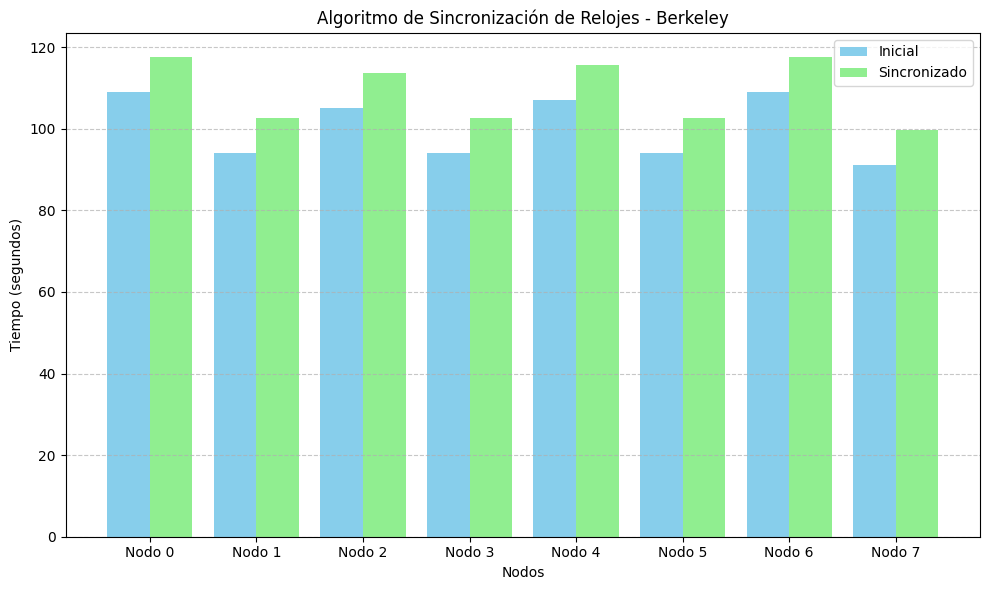

In [1]:
import random
import matplotlib.pyplot as plt

def berkeley_algorithm(nodos):
    print("=== TIEMPOS INICIALES DE LOS NODOS ===")
    for i, tiempo in enumerate(nodos):
        print(f"Reloj Nodo {i}: {tiempo} segundos")

    maestro = nodos[0]
    print(f"\nReloj del nodo maestro (Nodo 0): {maestro} segundos\n")

    # Paso 1: calcular diferencias
    diferencias = [tiempo - maestro for tiempo in nodos]

    print("=== DIFERENCIAS DE TIEMPO RESPECTO AL MAESTRO ===")
    for i, d in enumerate(diferencias):
        print(f"Nodo {i}: {d:+} segundos")

    # Paso 2: calcular promedio
    promedio = sum(diferencias) / len(diferencias)
    print(f"\nPromedio de diferencia: {promedio:+.2f} segundos")

    # Paso 3: ajustar relojes
    sincronizados = [round(tiempo - promedio, 2) for tiempo in nodos]

    print("\n=== RELOJES SINCRONIZADOS ===")
    for i, tiempo in enumerate(sincronizados):
        print(f"Nuevo reloj Nodo {i}: {tiempo} segundos")

    return sincronizados

def graficar_resultados(iniciales, sincronizados):
    nodos = [f"Nodo {i}" for i in range(len(iniciales))]
    x = list(range(len(nodos)))

    plt.figure(figsize=(10, 6))
    plt.bar(x, iniciales, width=0.4, label="Inicial", color='skyblue', align='center')
    plt.bar([i + 0.4 for i in x], sincronizados, width=0.4, label="Sincronizado", color='lightgreen', align='center')

    plt.xticks([i + 0.2 for i in x], nodos)
    plt.xlabel("Nodos")
    plt.ylabel("Tiempo (segundos)")
    plt.title("Algoritmo de Sincronización de Relojes - Berkeley")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Simulación de 8 nodos con tiempos entre 90 y 110
relojes_iniciales = [random.randint(90, 110) for _ in range(8)]
relojes_sincronizados = berkeley_algorithm(relojes_iniciales)

# Generar gráfico
graficar_resultados(relojes_iniciales, relojes_sincronizados)



=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfico antes/después
4. Salir
Elige una opción: 1

=== Tiempos de los nodos ===
Nodo 0: 95.99 seg
Nodo 1: 96.31 seg
Nodo 2: 103.67 seg
Nodo 3: 97.44 seg
Nodo 4: 109.88 seg
Nodo 5: 109.24 seg
Nodo 6: 100.65 seg
Nodo 7: 98.19 seg

=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfico antes/después
4. Salir
Elige una opción: 2

Maestro enviando su tiempo a los nodos esclavos...
Nodo 1 reporta desfase de +0.31 segundos
Nodo 2 reporta desfase de +7.67 segundos
Nodo 3 reporta desfase de +1.44 segundos
Nodo 4 reporta desfase de +13.89 segundos
Nodo 5 reporta desfase de +13.25 segundos
Nodo 6 reporta desfase de +4.65 segundos
Nodo 7 reporta desfase de +2.20 segundos

Promedio calculado: +5.43 segundos
Nodo 1 ajustado por +5.11 seg -> nuevo reloj: 101.42 seg
Nodo 2 ajustado por -2.25 seg -> nuevo reloj: 101.42 seg
Nodo 3 ajustado por +3.99 seg -> nuevo reloj: 101.42 seg
Nodo 4 ajustado po

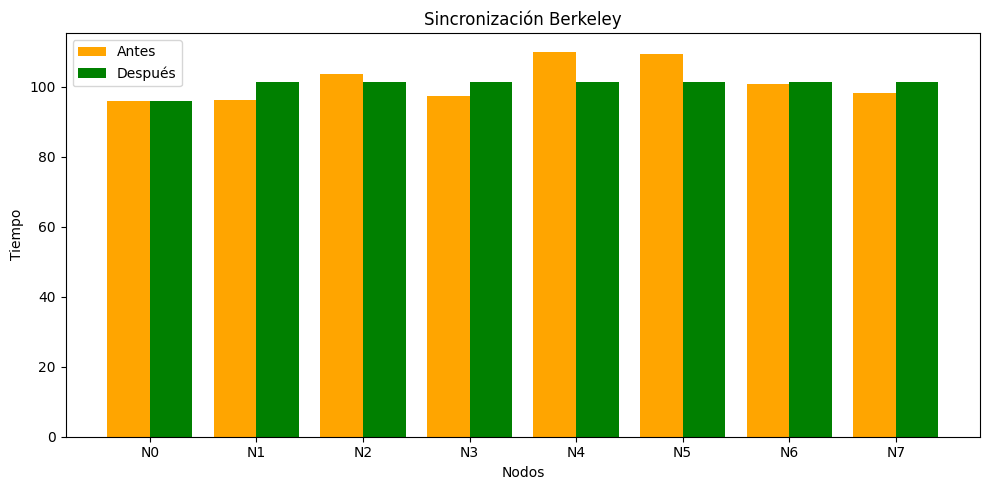


=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfico antes/después
4. Salir


In [ ]:
import random
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, id, reloj):
        self.id = id
        self.reloj = reloj

    def ajustar_reloj(self, ajuste):
        self.reloj += ajuste

def mostrar_relojes(nodos, titulo="Tiempos de los nodos"):
    print(f"\n=== {titulo} ===")
    for nodo in nodos:
        print(f"Nodo {nodo.id}: {nodo.reloj:.2f} seg")

def sincronizar_berkeley(nodos):
    maestro = nodos[0]
    offsets = []

    print("\nMaestro enviando su tiempo a los nodos esclavos...")

    # Cada nodo responde con su desfase (tiempo propio - tiempo del maestro)
    for nodo in nodos[1:]:
        offset = nodo.reloj - maestro.reloj
        print(f"Nodo {nodo.id} reporta desfase de {offset:+.2f} segundos")
        offsets.append(offset)

    # Calcular promedio de desfases incluyendo al maestro (0.0)
    promedio = sum(offsets + [0]) / len(nodos)
    print(f"\nPromedio calculado: {promedio:+.2f} segundos")

    # El maestro no se ajusta (asume tener el reloj correcto)
    for nodo in nodos[1:]:
        ajuste = promedio - (nodo.reloj - maestro.reloj)
        nodo.ajustar_reloj(ajuste)
        print(f"Nodo {nodo.id} ajustado por {ajuste:+.2f} seg -> nuevo reloj: {nodo.reloj:.2f} seg")

def graficar(nodos_antes, nodos_despues):
    ids = [f"N{i}" for i in range(len(nodos_antes))]
    tiempos_antes = [n.reloj for n in nodos_antes]
    tiempos_despues = [n.reloj for n in nodos_despues]

    x = list(range(len(ids)))

    plt.figure(figsize=(10, 5))
    plt.bar([i - 0.2 for i in x], tiempos_antes, width=0.4, label="Antes", color="orange")
    plt.bar([i + 0.2 for i in x], tiempos_despues, width=0.4, label="Después", color="green")

    plt.xticks(x, ids)
    plt.xlabel("Nodos")
    plt.ylabel("Tiempo")
    plt.title("Sincronización Berkeley")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Crear 8 nodos con tiempos aleatorios
nodos_originales = [Nodo(i, random.uniform(90, 110)) for i in range(8)]

# Clonar nodos para conservar copia antes de sincronizar
import copy
nodos_antes = copy.deepcopy(nodos_originales)

while True:
    print("\n=== MENU BERKELEY ===")
    print("1. Ver relojes actuales")
    print("2. Sincronizar relojes")
    print("3. Ver gráfico antes/después")
    print("4. Salir")
    opcion = input("Elige una opción: ")

    if opcion == "1":
        mostrar_relojes(nodos_originales)
    elif opcion == "2":
        sincronizar_berkeley(nodos_originales)
    elif opcion == "3":
        graficar(nodos_antes, nodos_originales)
    elif opcion == "4":
        break
    else:
        print("Opción inválida. Intenta de nuevo.")
